<a href="https://colab.research.google.com/github/tiwari0809/Guvi_task/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [4]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [5]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


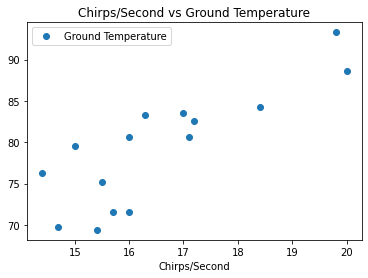

In [6]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.show()

In [7]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


There is strong linear relationship between Chirps/Second and Ground Temperature.

1. our target is Chirps/Second.
2. our feature is Ground Temperature

In [8]:
X = df.iloc[:, 1:].values # select all rows and select all columns except the last column as my feature
y = df.iloc[:, 0].values # target as arrays
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =50)


In [9]:
X_train.shape


(10, 1)

In [10]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c


LinearRegression()

In [11]:
print(regressor.intercept_) # c
print(regressor.coef_)

1.126295048640138
[0.19643263]


The Linear Regression equation is: y=0.19*x+1.12

2.Chart the original data and the equation on the chart.



In [12]:
y_pred1=regressor.predict(X_train)
y_pred1

array([14.7587196 , 15.19087139, 17.48913316, 15.89802885, 14.81764939,
       16.95876506, 15.19087139, 17.35163032, 16.11410475, 18.5302261 ])

In [13]:
data_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred1})
data_train


,Actual,Predicted
0,15.4,14.758720
1,15.7,15.190871
2,16.3,17.489133
3,15.5,15.898029
4,14.7,14.817649
5,17.1,16.958765
6,16.0,15.190871
7,17.2,17.351630
8,14.4,16.114105
9,20.0,18.530226


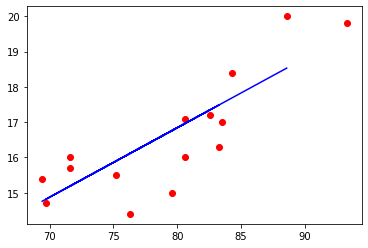

In [14]:
plt.scatter(X,y, color='red')
plt.plot(X_train,y_pred1, color='blue')
plt.show()

The Above graph shows Blue line which is predicted by the train data and shows Linear relationship.


1. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)


In [15]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred


array([17.52841969, 16.95876506, 16.76233243, 17.68556579, 19.45345946])

In [16]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,17.0,17.528420
1,16.0,16.958765
2,15.0,16.762332
3,18.4,17.685566
4,19.8,19.453459


In [17]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.659951765936371


The value of R2 is 0.66 which is less than 0.85, so there is not good correlation as per the question.


4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [18]:
y_prd=regressor.predict([[95]])
y_prd

array([19.78739494])

When the temperature reach 95 than the rate of chirping is around 19.78.

1. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [19]:
y=18
x=(y-1.12)/0.19
x

88.84210526315789

If Chirping rate is 18 than at that morning the ground temperature is 88.84F

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [22]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [23]:
df.describe()


,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


1. There is an outlier in the data.
2. Max value in above data shows outlier.
3. Mean and median value have large difference so the graph of this is right skewed.

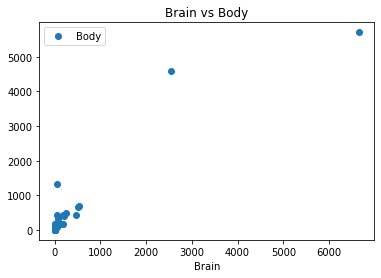

In [24]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.show()


In [25]:
df.corr()


,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


1. The correlation between both the columns is 0.93 which is greater than 0.2 and shows high correlation/Linear relationship between them.

2. Due to strong Linear relation we apply linear regression model.

3. Body weight is the feature and brain is Target.



In [27]:
X = df[['Body']].values # select all rows and select all columns except the last column as my feature
y = df[['Brain']].values # target as arrays
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 500)

y_test


array([[7.850e-01],
       [3.600e+00],
       [4.800e-02],
       [3.500e+00],
       [1.000e-02],
       [4.288e+00],
       [5.500e-01],
       [1.040e-01],
       [1.871e+02],
       [6.654e+03],
       [6.000e+01],
       [1.000e+00],
       [1.200e-01],
       [7.500e-01],
       [3.633e+01],
       [3.385e+00],
       [1.483e+01],
       [4.650e+02],
       [3.300e+00]])

In [28]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [29]:
print(regressor.intercept_) #c
print(regressor.coef_) #m


[-15.35250209]
[[0.52630028]]


According to above the linear equation for model is: Brain=(0.52)*Body+(-15.35)


In [30]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred

array([[-1.35104511e+01],
       [-4.30019613e+00],
       [-1.51788230e+01],
       [-1.32999310e+01],
       [-1.52209270e+01],
       [ 5.27846903e+00],
       [-1.40893814e+01],
       [-1.40367514e+01],
       [ 2.05167317e+02],
       [ 2.99087472e+03],
       [ 2.72778209e+01],
       [-1.18789202e+01],
       [-1.48262018e+01],
       [-8.87900860e+00],
       [ 4.75403818e+01],
       [ 8.06786053e+00],
       [ 3.63301858e+01],
       [ 2.07272518e+02],
       [-1.87921483e+00]])

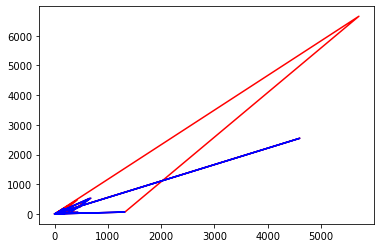

In [31]:
plt.plot(X,y, color='red')
plt.plot(X_train,y_train, color='blue')
plt.show()

In [32]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.675903159244484


Here the R-square value is 0.67 which is lesser than 0.8

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [33]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [34]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


Not much difference between mean and median, so no skew.

In [35]:
df.isnull().sum()


Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [36]:
df.dtypes


Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [37]:
print("Number of Female worker: ",df['Sex'].value_counts()[1])
print("Number of Male worker: ",df['Sex'].value_counts()[0])


Number of Female worker:  14
Number of Male worker:  38


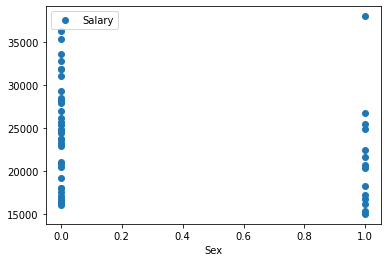

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [38]:
df.plot(x='Sex', y='Salary', style='o')
plt.show()
# 1 for female, 0 for male
df[['Sex', 'Salary']].corr()


1. Highest Salary taken by Female worker.
2. Number of male workers is more than female workers.
3. Correlation between Sex and Salary is -0.25 which lie between -0.2 and -1. There is some linear relation between them.


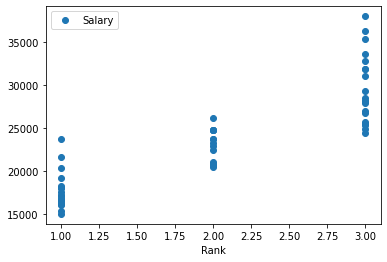

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [39]:
df.plot(x='Rank', y='Salary', style='o')
plt.show()
df[['Rank', 'Salary']].corr()


1. High salary are taken by rank 3 employees.
2. There is strong linear relationship of 0.8 between Rank and Salary.
3. As per graph as rank increases generally the salary also increases it also shows linear relationship.

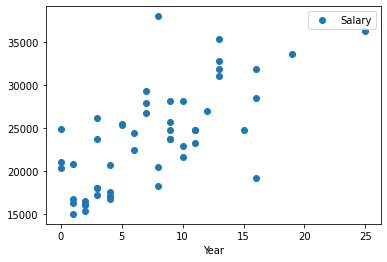

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [40]:
df.plot(x='Year', y='Salary', style='o')
plt.show()
df[['Year', 'Salary']].corr()


Correlation between Years and salary is 0.7 which shows good linear relationship between both of them.


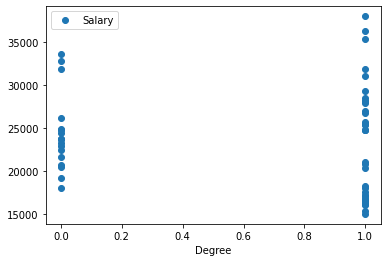

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [41]:
df.plot(x='Degree', y='Salary', style='o')
plt.show()
df[['Degree','Salary']].corr()


* There is no linear Relationship between Degree and Salary. The correlation between both is -0.06 which shows NO linear relationship.
* There is no linear relationship so for linear relationship we may transform the data.


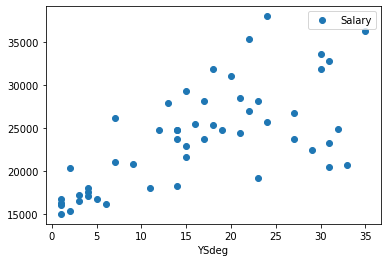

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [42]:
df.plot(x='YSdeg', y='Salary', style='o')
plt.show()
df[['YSdeg','Salary']].corr()

* The correlation between YSdeg and Salary is 0.67 which shows a good linear relation between both of them.
* From above Correlation an Plotting we get.
1. There is good Linear relationship between Rank, Years, YSdeg AND Salary.
2. There is little and some linear relation between Sex and Salary.
3. There is no linear relationship between Degree and Salary.


In [43]:
X= df[['Sex','Rank','Year','YSdeg']].values
y= df[['Salary']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [44]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [45]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c


LinearRegression()

In [46]:
print(regressor.intercept_) #c
print(regressor.coef_) #m


[9814.36968417]
[[1143.94635066 5472.91247423  449.61251588  -61.58427036]]


In [47]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred


array([[21677.94228776],
       [16839.39514049],
       [26334.28123401],
       [22815.87223814],
       [29312.7940474 ],
       [20003.58961247],
       [16389.78262461],
       [18471.61501629],
       [24843.75252228],
       [32928.2167978 ],
       [30273.60334952]])

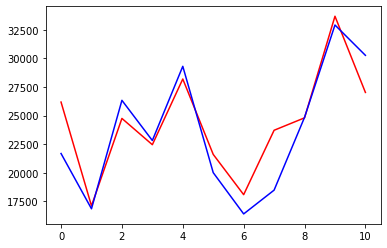

In [48]:
plt.plot(y_test, color='red')
plt.plot(y_pred, color='blue')
plt.show()

In [49]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))


R2- SCORE: 0.6849913790081124
